<a href="https://colab.research.google.com/github/MandilJThapa/Landsat-Time-Series-Analysis-for-Multi-Temporal-Land-Cover-Classification/blob/master/Satellite_Imagery_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import random

In [3]:
minmaxscaler= MinMaxScaler()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls -lah '/content/drive/MyDrive/dataset_satellite/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Feb 11 05:26  classes.json
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 1'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 2'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 3'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 4'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 5'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 6'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 7'
drwx------ 2 root root 4.0K Feb 11 05:41 'Tile 8'


In [6]:
dataset_root_folder= '/content/drive/MyDrive/dataset_satellite'

In [7]:
dataset_name= "Semantic segmentation dataset"

In [8]:
# To get all images---------------------------------------------------------------------
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name= path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    # print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.jpg')):
        # print(image_name)
        pass

In [9]:
image_path_size= 256

In [10]:
image= cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 4/images/image_part_001.jpg',1)

In [11]:
print(type(image))

<class 'numpy.ndarray'>


In [12]:
type(Image.fromarray(image))

PIL.Image.Image

In [13]:
image.shape

(846, 1099, 3)

In [14]:
image_patches= patchify(image, (image_path_size, image_path_size,3), step= image_path_size)

In [15]:
image_patches

array([[[[[[228, 231, 255],
           [ 88,  92, 117],
           [ 82,  86, 111],
           ...,
           [ 46,  43,  52],
           [ 48,  45,  54],
           [ 59,  56,  65]],

          [[ 89,  92, 120],
           [ 71,  76, 101],
           [135, 139, 163],
           ...,
           [ 48,  45,  54],
           [ 49,  46,  55],
           [ 61,  58,  67]],

          [[ 67,  72,  97],
           [ 68,  76,  99],
           [121, 127, 150],
           ...,
           [ 53,  48,  57],
           [ 47,  44,  53],
           [ 59,  56,  65]],

          ...,

          [[155, 163, 180],
           [145, 154, 168],
           [161, 169, 182],
           ...,
           [ 46,  38,  49],
           [ 27,  17,  30],
           [ 44,  30,  41]],

          [[145, 152, 167],
           [131, 138, 153],
           [161, 167, 180],
           ...,
           [ 37,  29,  40],
           [ 26,  16,  29],
           [ 44,  30,  41]],

          [[119, 126, 141],
           [125, 133, 146]

In [16]:
len(image_patches)

3

In [17]:
image_patches.shape

(3, 4, 1, 256, 256, 3)

In [18]:
image_x = image_patches[0,0,:,:].shape
image_x = np.array(image_x)
minmaxscaler= MinMaxScaler()
image_y= minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [19]:
(image.shape[0]// image_path_size)*image_path_size

768

In [20]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 20):
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    size_x = (image.shape[1] // image_path_size) * image_path_size
                    size_y = (image.shape[0] // image_path_size) * image_path_size
                    image = Image.fromarray(image)
                    image = image.crop((0, 0, size_x, size_y))
                    image = np.array(image)

                patched_images = patchify(image, (image_path_size, image_path_size, 3), step=image_path_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i, j, :, :]
                            # print(individual_patched_image[0].shape)
                            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)

                            individual_patched_image = individual_patched_image[0]
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i, j, :, :]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)


In [21]:
len(image_dataset)

945

In [22]:
len(mask_dataset)

945

In [23]:
image_dataset= np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

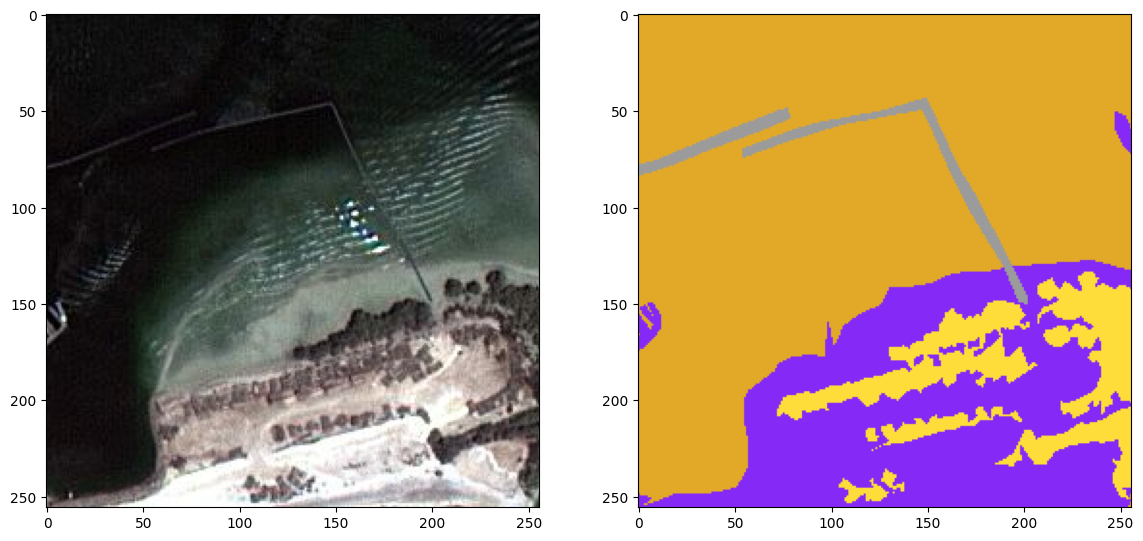

In [24]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [25]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building= np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land= np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road= np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation= np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water  = class_water .lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_Unlabeled = '#9B9B9B'
class_Unlabeled = class_Unlabeled.lstrip('#')
class_Unlabeled= np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
label= individual_patched_mask


In [27]:
def rgb_to_label(label):
  label_segment= np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label== class_water, axis=-1)]= 0
  label_segment[np.all(label== class_land, axis=-1)]= 1
  label_segment[np.all(label== class_road, axis=-1)]= 2
  label_segment[np.all(label== class_building, axis=-1)]= 3
  label_segment[np.all(label== class_vegetation, axis=-1)]= 4
  label_segment[np.all(label== class_Unlabeled, axis=-1)]= 5
  label_segment= label_segment[:,:,0]

  return label_segment

In [28]:
labels= []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [29]:
labels=  np.array(labels)

In [30]:
labels= np.expand_dims(labels, axis=3)

In [31]:

labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [32]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

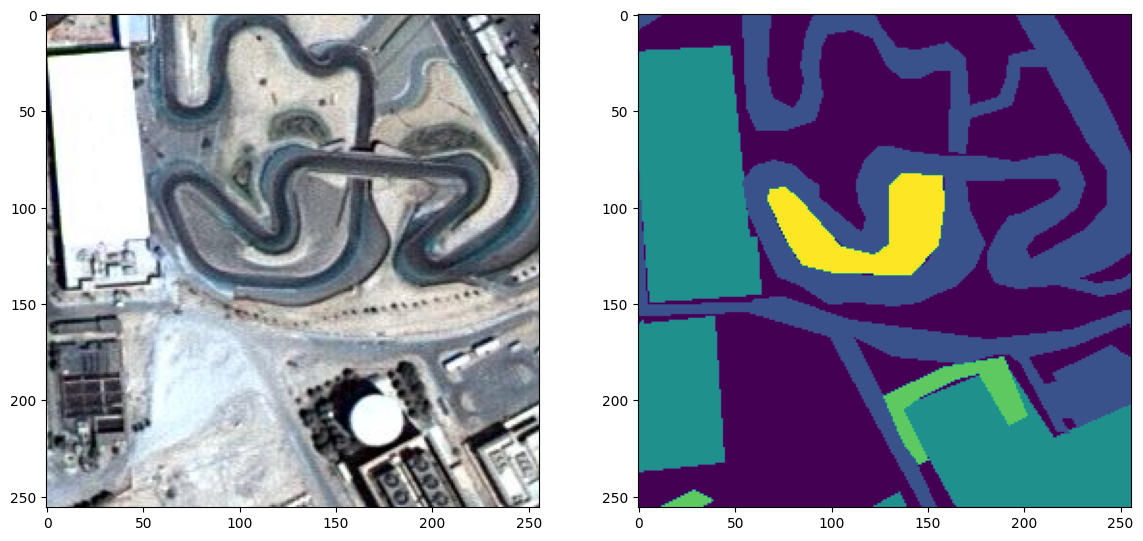

In [33]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
# plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [34]:
total_classes = len(np.unique(labels))

In [35]:
total_classes

6

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
labels_categorical_datasets = to_categorical(labels, num_classes= total_classes)

In [38]:
labels_categorical_datasets.shape


(945, 256, 256, 6)

In [39]:
# master_training_dataset.shape

In [40]:
master_training_dataset= image_dataset

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test= train_test_split(master_training_dataset, labels_categorical_datasets, test_size = 0.15, random_state= 100)

In [43]:
image_height= X_train.shape[1]
print(image_height)
image_width = X_train.shape[2]
print(image_width)
image_channels= X_train.shape[3]
print(image_channels)

total_classes= y_train.shape[3]
print(total_classes)

256
256
3
6


# Part 2

In [44]:
!pip install keras>=2.2.0



In [45]:
!pip install tensorflow>=1.13


In [46]:
!pip install -U segmentation-models==0.2.1




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 698.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.2 MB/s eta 0:00:00


In [47]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [48]:
from keras import backend as K

In [49]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten= K.flatten(y_true)
  y_pred_flatten= K.flatten(y_pred)
  intersection= K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value= intersection + 1.0 / (K.sum(y_true_flatten)+ K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [50]:
def multi_unet_model(n_classes= 5, image_height= 256, image_width= 256, image_channels=1):

  inputs= Input((image_height,image_width, image_channels))
  source_input= inputs
  c1= Conv2D( 16, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(source_input)
  c1= Dropout(0.2)(c1)
  c1= Conv2D( 16, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c1)
  p1= MaxPooling2D((2,2))(c1)

  c2= Conv2D( 32, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(p1)
  c2= Dropout(0.2)(c2)
  c2= Conv2D( 32, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c2)
  p2= MaxPooling2D((2,2))(c2)

  c3= Conv2D( 64, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(p2)
  c3= Dropout(0.2)(c3)
  c3= Conv2D( 64, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c3)
  p3= MaxPooling2D((2,2))(c3)

  c4= Conv2D( 128, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(p3)
  c4= Dropout(0.2)(c4)
  c4= Conv2D( 128, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c4)
  p4= MaxPooling2D((2,2))(c4)

  c5= Conv2D( 256, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(p4)
  c5= Dropout(0.2)(c5)
  c5= Conv2D( 256, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c5)

  u6= Conv2DTranspose(128, (2,2), strides= (2,2), padding="same")(c5)
  u6= concatenate([u6, c4])
  c6= Conv2D( 128, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(u6)
  c6= Dropout(0.2)(c6)
  c6= Conv2D( 128, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c6)

  u7= Conv2DTranspose(64, (2,2), strides= (2,2), padding="same")(c6)
  u7= concatenate([u7, c3])
  c7= Conv2D( 64, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(u7)
  c7= Dropout(0.2)(c7)
  c7= Conv2D( 64, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c7)

  u8= Conv2DTranspose(32, (2,2), strides= (2,2), padding="same")(c7)
  u8= concatenate([u8, c2])
  c8= Conv2D( 32, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(u8)
  c8= Dropout(0.2)(c8)
  c8= Conv2D( 32, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c8)

  u9= Conv2DTranspose(16, (2,2), strides= (2,2), padding="same")(c8)
  u9= concatenate([u9, c1], axis= 3)
  c9= Conv2D( 16, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(u9)
  c9= Dropout(0.2)(c9)
  c9= Conv2D( 16, (3,3), activation= "relu", kernel_initializer="he_normal",padding= "same")(c9)

  outputs= Conv2D(n_classes, (1,1), activation= "softmax")(c9)
  model= Model(inputs= [inputs], outputs= [outputs])
  return model




In [51]:
metrics= ['accuracy', jaccard_coef]

In [52]:
def get_deep_learning_model():
  return multi_unet_model(n_classes= total_classes,
                          image_height= image_height,
                          image_width= image_width,
                          image_channels=image_channels)

In [53]:
model= get_deep_learning_model()

In [54]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0,

In [55]:
weights= [0.166,0.166,0.166,0.166,0.166,0.166]

In [56]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [57]:
dice_loss= sm.losses.DiceLoss(class_weights= weights)
type(dice_loss)

segmentation_models.losses.DiceLoss

In [58]:
focal_loss= sm.losses.CategoricalFocalLoss()
type(focal_loss)

segmentation_models.losses.CategoricalFocalLoss

In [59]:
total_loss= dice_loss + (1 * focal_loss)

# Model Compilation

In [60]:
import tensorflow as tf

In [61]:
tf.keras.backend.clear_session()

In [62]:
model.compile(optimizer= "adam", loss=total_loss, metrics= metrics)

In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [64]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [65]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs= ()):
    self.i= 0
    self.x= []
    self.losses= []
    self.val_losses= []

    self.fig= plt.figure()

    self.logs= []





  def on_epoch_end(self, epoch, logs= {}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait= True)
    plt.plot(self.x, self.losses, label= "loss")
    plt.plot(self.x, self.val_losses, label= "val_loss")
    plt.legend()
    plt.show();


plot_loss= PlotLoss()





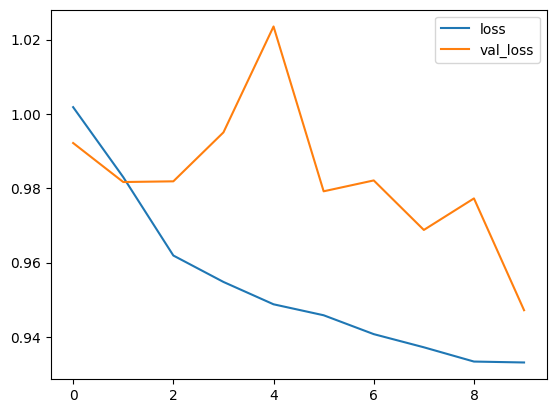

51/51 [==============================] - 11s 224ms/step - loss: 0.9332 - accuracy: 0.8017 - jaccard_coef: 776339.5000 - val_loss: 0.9472 - val_accuracy: 0.7618 - val_jaccard_coef: 740349.7500


In [66]:
model_history = model.fit(X_train,y_train, batch_size= 16, verbose= 1, epochs= 10, validation_data= (X_test, y_test),callbacks= [plot_loss], shuffle= False)

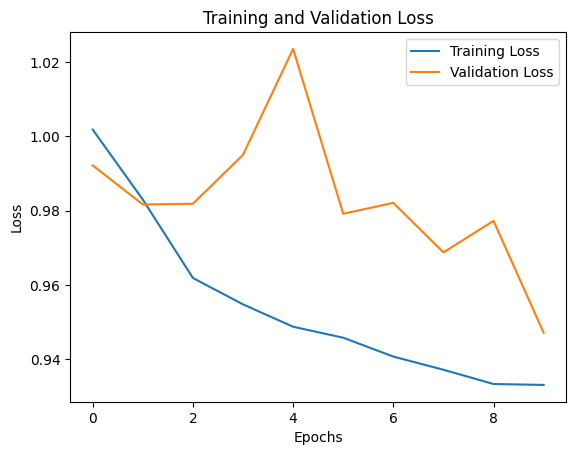

In [67]:
import matplotlib.pyplot as plt

# Accessing loss history
training_loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']

# Plotting loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


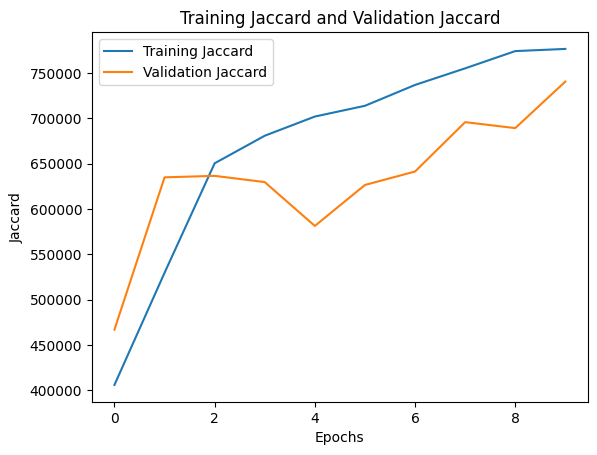

In [68]:
training_jaccard = model_history.history['jaccard_coef']
validation_jaccard = model_history.history['val_jaccard_coef']

# Plotting loss
plt.plot(training_jaccard, label='Training Jaccard')
plt.plot(validation_jaccard, label='Validation Jaccard')
plt.xlabel('Epochs')
plt.ylabel('Jaccard')
plt.title('Training Jaccard and Validation Jaccard')
plt.legend()
plt.show()

In [69]:
y_pred= model.predict(X_test)

5/5 [==============================] - 5s 58ms/step


In [70]:
y_pred_argmax= np.argmax(y_pred, axis= 3)

In [71]:
y_test_argmax= np.argmax(y_test, axis= 3)

# Comparing Prediction results

In [72]:
test_image_number= 10
test_image= X_test[test_image_number]
ground_truth_image= y_test_argmax[test_image_number]

test_image_input= np.expand_dims(test_image,0)

prediction= model.predict(test_image_input)
predicted_image= np.argmax(prediction, axis= 3)
predicted_image= predicted_image[0,:,:]



1/1 [==============================] - 1s 882ms/step


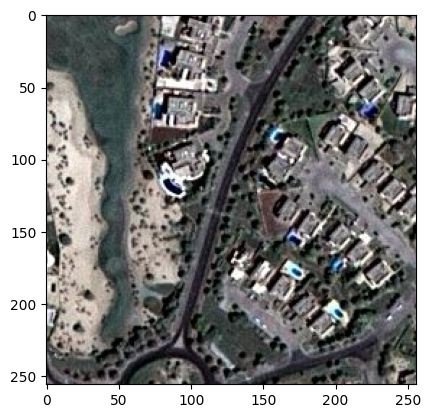

In [73]:
plt.imshow(test_image)

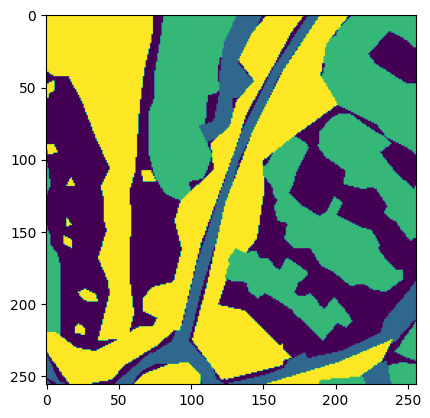

In [74]:
plt.imshow(ground_truth_image)

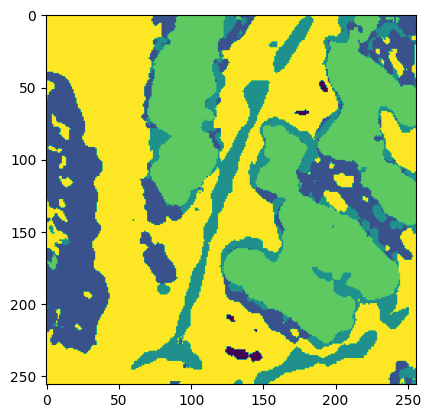

In [75]:
plt.imshow(predicted_image)

In [76]:
model.save("satellite_segmentation_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
